#### Part 1 - Introduction

Clear context, integrates domain knowledge, cites literature, highlights data significance. i.e. put "based on theory, factors affecting earth's surface temp are..."

#### Part 2 - Research Question

Innovative problem definition, clear objectives, critical thinking.

- plot temp over the years, see that if it's increasing
- if yes, then it's a problem -> reason why we choose temp as target var

#### Part 3 - Methodology

Scientifically justified methods, reproducible steps, technical depth.

##### 3A. Data Description

In [123]:
import pandas as pd

climate_data = pd.read_csv('project_1.csv')

# Display information
print(climate_data.head())
print(climate_data.info())

                  time  TREFMXAV_U       FLNS       FSNS         PRECT  \
0  2006-01-02 00:00:00   282.77585  41.925180  25.926952  4.663135e-09   
1  2006-01-03 00:00:00   284.47113   8.905806  10.946910  8.046593e-08   
2  2006-01-04 00:00:00   284.28796  16.511415   6.405902  2.910936e-09   
3  2006-01-05 00:00:00   282.12110  29.948362   9.315041  7.432505e-11   
4  2006-01-06 00:00:00   280.89090  19.064156   7.941241  6.894238e-12   

           PRSN      QBOT     TREFHT      UBOT      VBOT        lat    lon  
0  4.781004e-17  0.004769  279.14288  3.878579  1.394184  53.246075  357.5  
1  1.295726e-16  0.006271  281.14865  1.788157  3.821703  53.246075  357.5  
2  4.094447e-16  0.005782  281.22380  0.804845 -2.299140  53.246075  357.5  
3  0.000000e+00  0.004277  278.39767 -1.100267 -1.258029  53.246075  357.5  
4  0.000000e+00  0.003990  278.06378 -0.706321 -0.938421  53.246075  357.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27374 entries, 0 to 27373
Data columns (tot

In [125]:
# Missing values
missing_values = climate_data.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
time          0
TREFMXAV_U    0
FLNS          0
FSNS          0
PRECT         0
PRSN          0
QBOT          0
TREFHT        0
UBOT          0
VBOT          0
lat           0
lon           0
dtype: int64


In [127]:
# Duplicates
duplicates = climate_data[climate_data.duplicated()]
print(f"Duplicate rows: {len(duplicates)}")

Duplicate rows: 0


In [129]:
# Summary statistics
num_columns = climate_data.select_dtypes(include=['number']).columns
print(f"Numerical Columns in store dataset: {num_columns}")
print(climate_data[num_columns].describe())

Numerical Columns in store dataset: Index(['TREFMXAV_U', 'FLNS', 'FSNS', 'PRECT', 'PRSN', 'QBOT', 'TREFHT', 'UBOT',
       'VBOT', 'lat', 'lon'],
      dtype='object')
         TREFMXAV_U          FLNS          FSNS         PRECT          PRSN  \
count  27374.000000  27374.000000  27374.000000  2.737400e+04  2.737400e+04   
mean     288.836179     42.995679     97.026261  3.379697e-08  3.049825e-10   
std        5.246468     21.451927     75.062880  4.986518e-08  4.706017e-09   
min      274.153200      0.611385      2.819259 -4.671764e-28 -6.256338e-21   
25%      284.719465     26.157544     31.037187  2.131118e-09  0.000000e+00   
50%      288.299895     40.777005     78.443183  1.311730e-08  1.206375e-21   
75%      292.869525     57.113572    149.332133  4.637272e-08  2.348279e-16   
max      311.257260    111.851400    310.191700  7.752961e-07  2.332090e-07   

               QBOT        TREFHT          UBOT          VBOT           lat  \
count  27374.000000  27374.000000  27374.

##### 3B. Data Preprocessing

In [132]:
# Change datatype to datetime
climate_data['time'] = pd.to_datetime(climate_data['time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [134]:
# Extract 'year' and 'month' from the 'time' column
climate_data['year'] = climate_data['time'].dt.year
climate_data['month'] = climate_data['time'].dt.month

In [136]:
# PRECT cant be negative. Replace negative PRECT to 0

# Check how many entries where PRECT is <0
negative_entries = climate_data[(climate_data['PRECT'] < 0)]
print(f"Number of negative entries before fix: {len(negative_entries)}")

# Replace negative PRECT values with 0
climate_data.loc[(climate_data['PRECT'] < 0), 'PRECT'] = 0

# Verify the fix
negative_entries_after = climate_data[(climate_data['PRECT'] < 0)]
print(f"Number of negative entries after fix: {len(negative_entries_after)}")

Number of negative entries before fix: 1
Number of negative entries after fix: 0


In [138]:
# PRSN cant be negative. Replace negative PRSN to 0

# Check how many entries where PRSN is <0
negative_entries = climate_data[(climate_data['PRSN'] < 0)]
print(f"Number of negative entries before fix: {len(negative_entries)}")

# Replace negative PRSN values with 0
climate_data.loc[(climate_data['PRSN'] < 0), 'PRSN'] = 0

# Verify the fix
negative_entries_after = climate_data[(climate_data['PRSN'] < 0)]
print(f"Number of negative entries after fix: {len(negative_entries_after)}")

Number of negative entries before fix: 1048
Number of negative entries after fix: 0


##### 3C. Initial EDA - Check Distribution and Trends of the Data

Trends of Potential Target Variable

TREFMXAV_U (Temperature on Land)

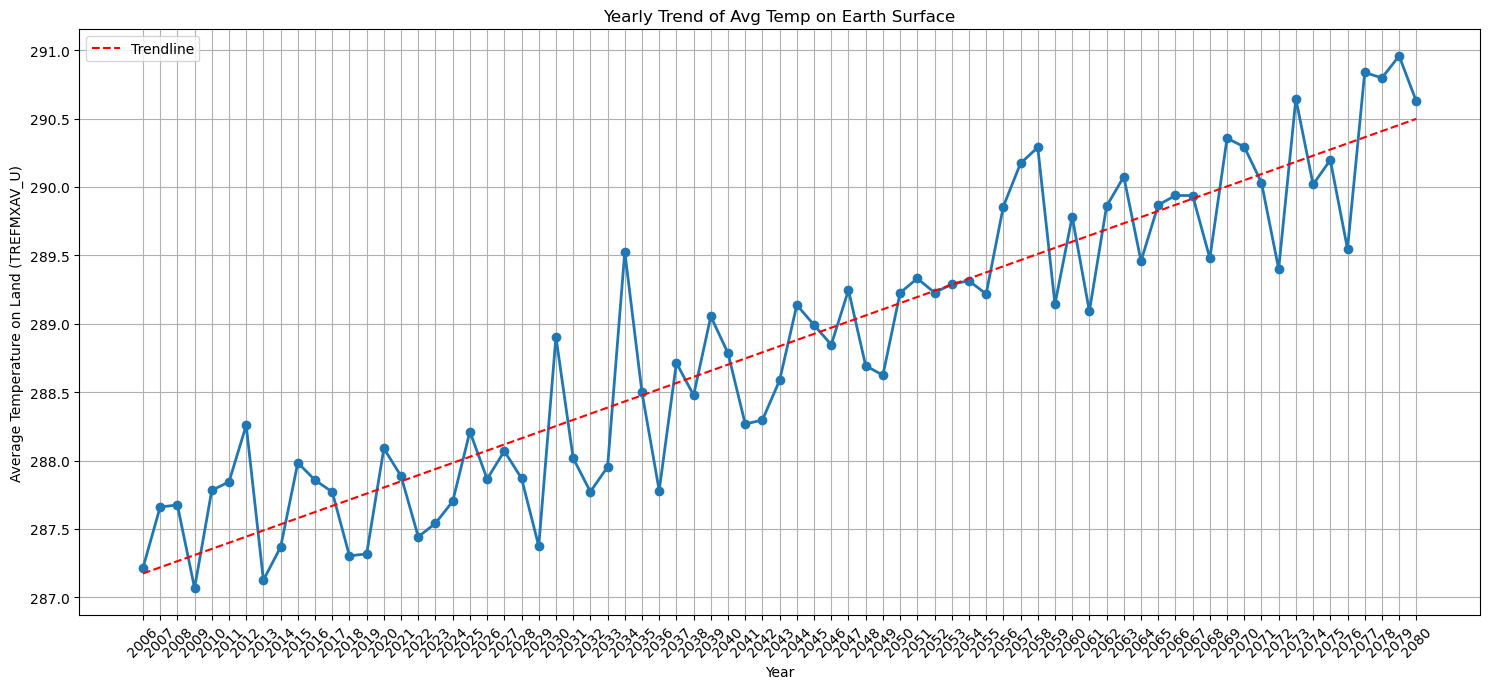

In [85]:
# See YoY patterns

import matplotlib.pyplot as plt

# Group by year and calculate the average temperature for each year
yearly_trend = climate_data.groupby('year')['TREFMXAV_U'].mean().reset_index()

# Plotting the yearly trend
plt.figure(figsize=(15, 7))
plt.plot(yearly_trend['year'], yearly_trend['TREFMXAV_U'], marker='o', linestyle='-', linewidth=2, markersize=6)

# Adding a trendline
import numpy as np
z = np.polyfit(yearly_trend['year'], yearly_trend['TREFMXAV_U'], 1)  # Linear fit
p = np.poly1d(z)
plt.plot(yearly_trend['year'], p(yearly_trend['year']), linestyle='--', color='red', label='Trendline')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Temperature on Land (TREFMXAV_U)')
plt.title('Yearly Trend of Avg Temp on Earth Surface')

# Fixing the x-axis ticks
plt.xticks(yearly_trend['year'], rotation=45)  # Rotates year labels for better visibility

# Adding grid, legend, and layout adjustments
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

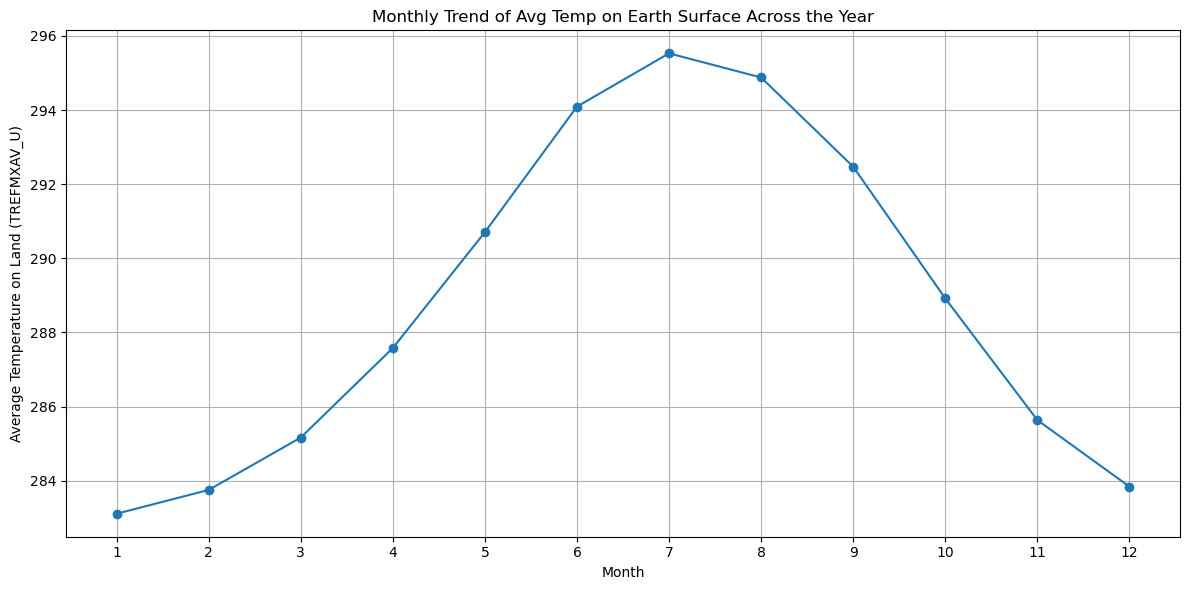

In [86]:
# See MoM patterns

# Group by month and calculate the average temperature for each month across all years
monthly_trend = climate_data.groupby('month')['TREFMXAV_U'].mean().reset_index()

# Plotting the monthly trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['month'], monthly_trend['TREFMXAV_U'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Average Temperature on Land (TREFMXAV_U)')
plt.title('Monthly Trend of Avg Temp on Earth Surface Across the Year')

# Improving grid and layout
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months are labeled
plt.tight_layout()

plt.show()

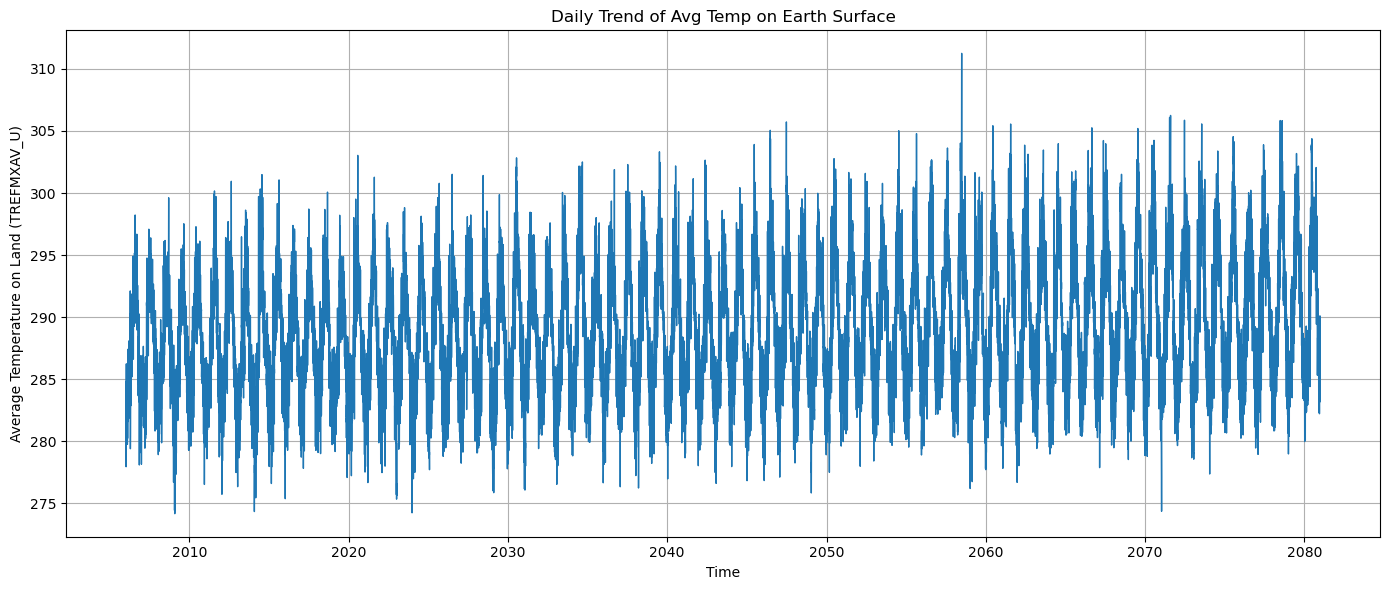

In [89]:
# See DoD patterns

import matplotlib.pyplot as plt

# Plotting the line plot
plt.figure(figsize=(14, 6))
plt.plot(climate_data['time'], climate_data['TREFMXAV_U'], linewidth=1)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Average Temperature on Land (TREFMXAV_U)')
plt.title('Daily Trend of Avg Temp on Earth Surface')

# Improving the x-axis date formatting
plt.grid(True)
plt.tight_layout()

plt.show()

TREFHT (Temperature in Atmosphere)

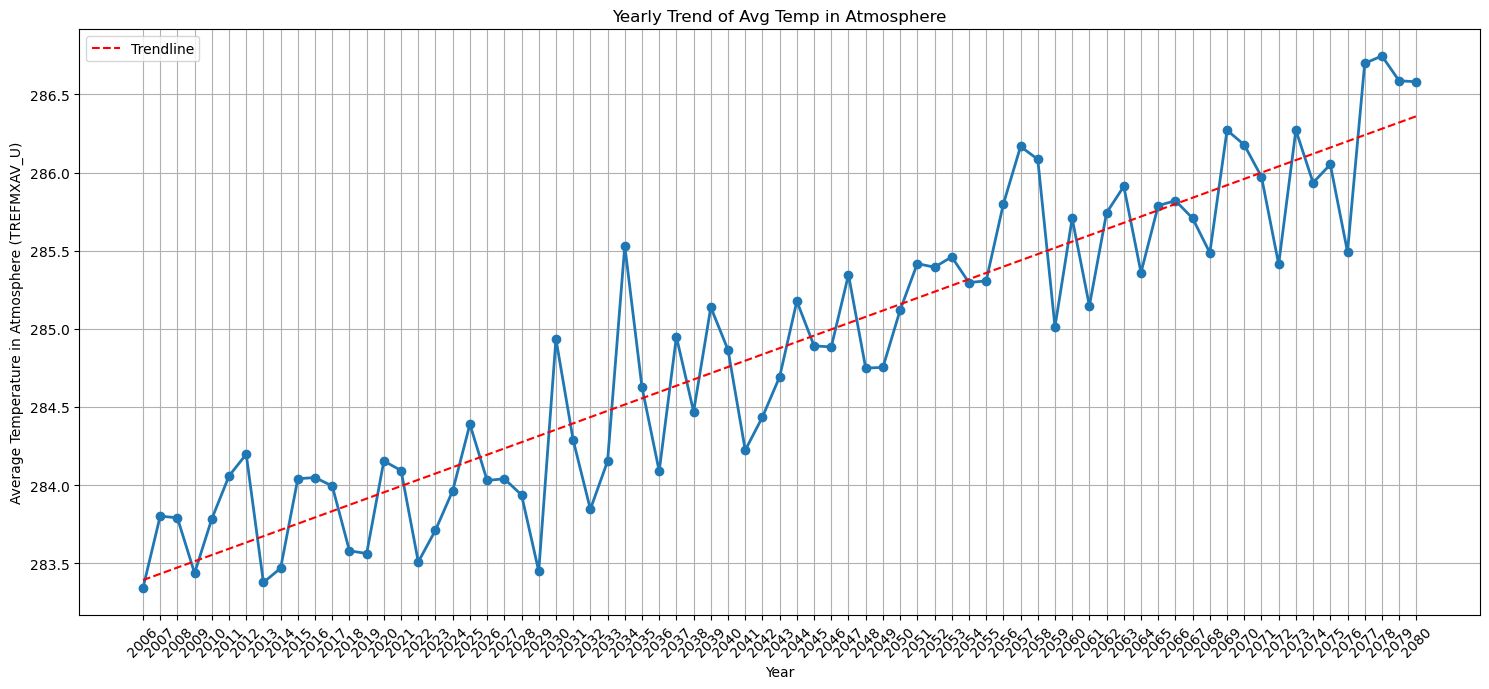

In [92]:
# See YoY patterns

# Group by year and calculate the average temperature for each year
yearly_trend = climate_data.groupby('year')['TREFHT'].mean().reset_index()

# Plotting the yearly trend
plt.figure(figsize=(15, 7))
plt.plot(yearly_trend['year'], yearly_trend['TREFHT'], marker='o', linestyle='-', linewidth=2, markersize=6)

# Adding a trendline
z = np.polyfit(yearly_trend['year'], yearly_trend['TREFHT'], 1)  # Linear fit
p = np.poly1d(z)
plt.plot(yearly_trend['year'], p(yearly_trend['year']), linestyle='--', color='red', label='Trendline')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Temperature in Atmosphere (TREFMXAV_U)')
plt.title('Yearly Trend of Avg Temp in Atmosphere')

# Fixing the x-axis ticks
plt.xticks(yearly_trend['year'], rotation=45)  # Rotates year labels for better visibility

# Adding grid, legend, and layout adjustments
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

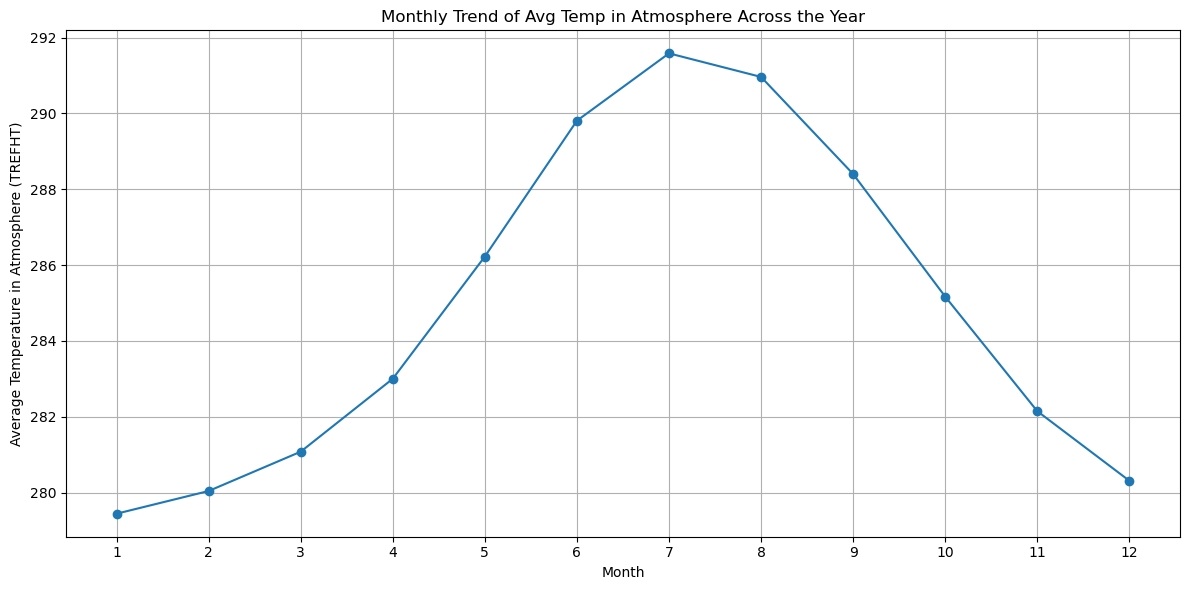

In [93]:
# See MoM patterns

# Group by month and calculate the average temperature for each month across all years
monthly_trend = climate_data.groupby('month')['TREFHT'].mean().reset_index()

# Plotting the monthly trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['month'], monthly_trend['TREFHT'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Average Temperature in Atmosphere (TREFHT)')
plt.title('Monthly Trend of Avg Temp in Atmosphere Across the Year')

# Improving grid and layout
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months are labeled
plt.tight_layout()

plt.show()

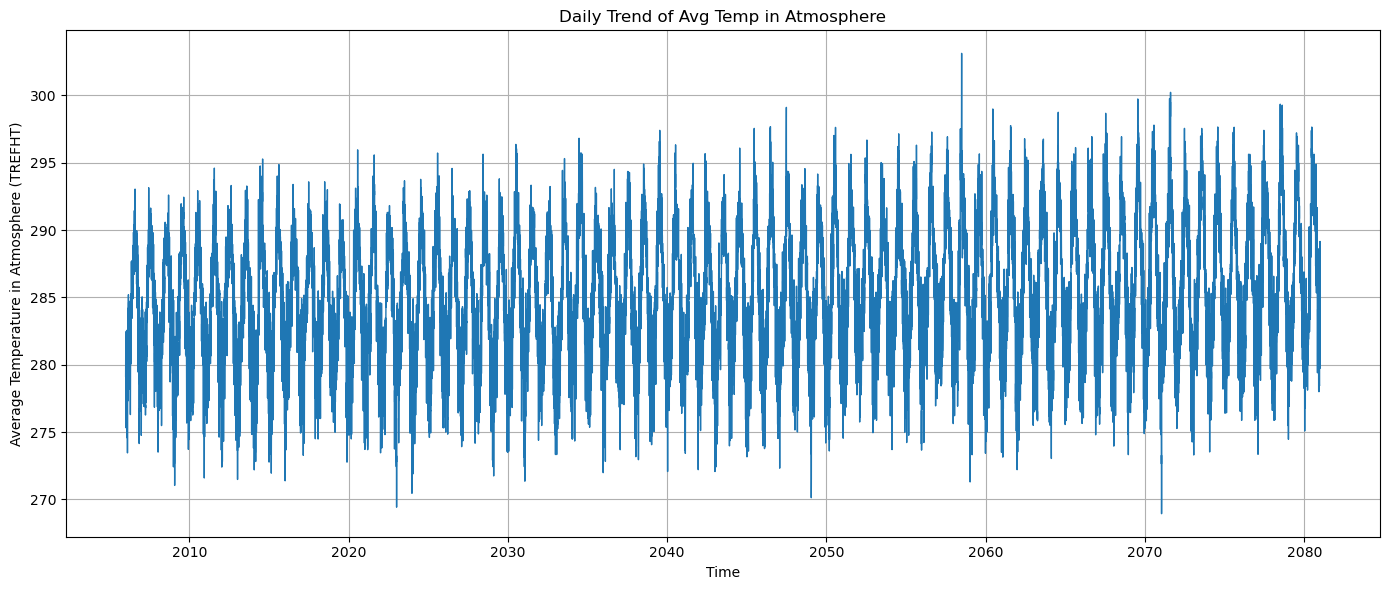

In [95]:
# See DoD patterns

# Plotting the line plot
plt.figure(figsize=(14, 6))
plt.plot(climate_data['time'], climate_data['TREFHT'], linewidth=1)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Average Temperature in Atmosphere (TREFHT)')
plt.title('Daily Trend of Avg Temp in Atmosphere')

# Improving the x-axis date formatting
plt.grid(True)
plt.tight_layout()

plt.show()

Distirbution of All Variables

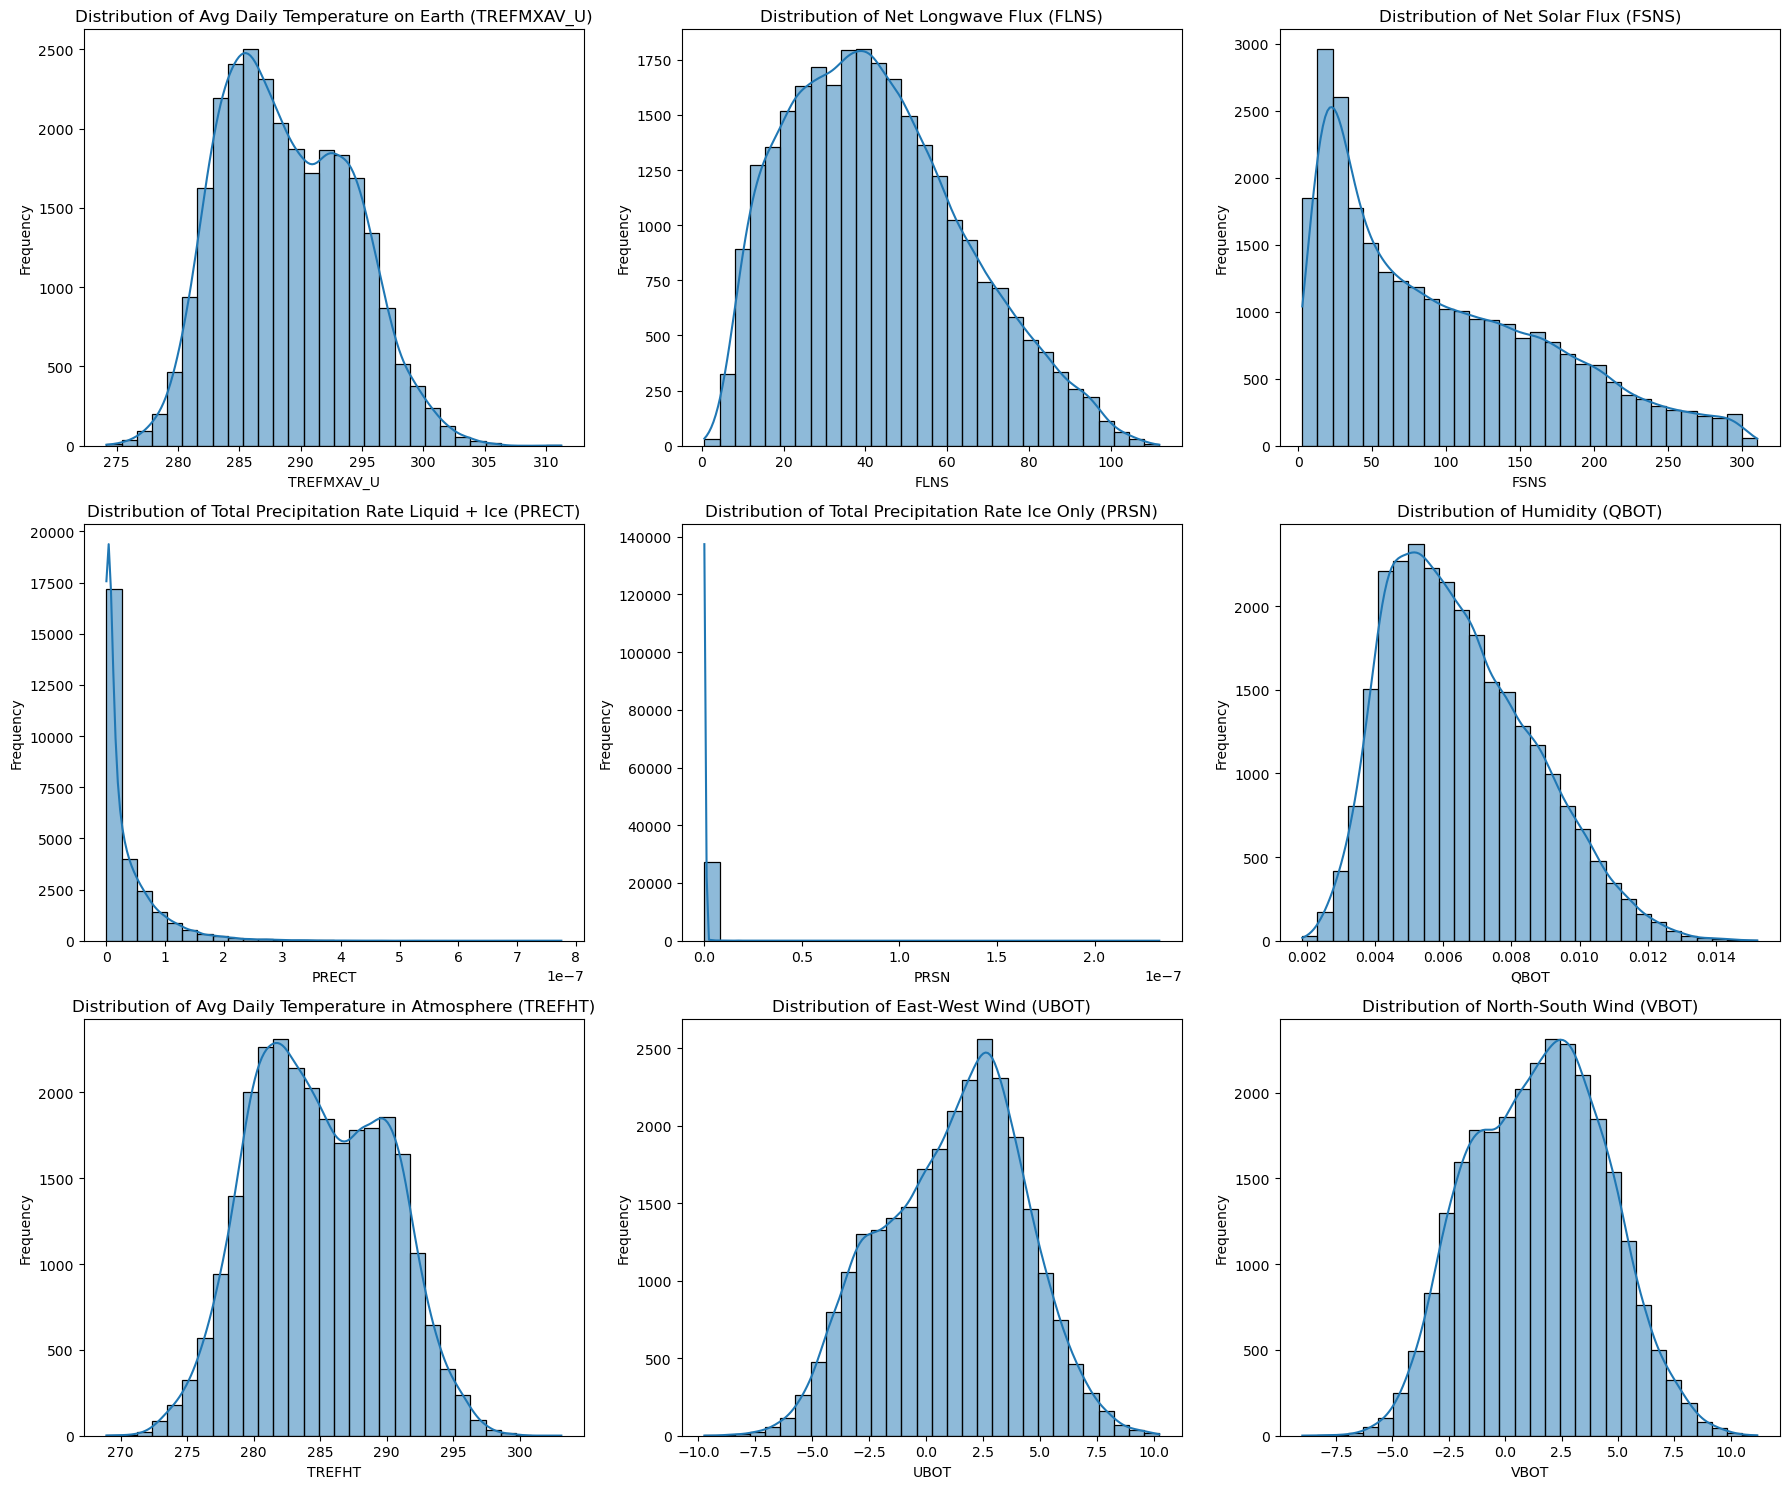

In [106]:
# Create subplots: 3 rows, 3 columns (for up to 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # Adjust figsize as needed

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot 1: TREFMXAV_U Distribution
sns.histplot(climate_data['TREFMXAV_U'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Avg Daily Temperature on Earth (TREFMXAV_U)")
axes[0].set_xlabel("TREFMXAV_U")
axes[0].set_ylabel("Frequency")

# Plot 2: FLNS Distribution
sns.histplot(climate_data['FLNS'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Net Longwave Flux (FLNS)")
axes[1].set_xlabel("FLNS")
axes[1].set_ylabel("Frequency")

# Plot 3: FSNS Distribution
sns.histplot(climate_data['FSNS'], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Distribution of Net Solar Flux (FSNS)")
axes[2].set_xlabel("FSNS")
axes[2].set_ylabel("Frequency")

# Plot 4: PRECT Distribution
sns.histplot(climate_data['PRECT'], bins=30, kde=True, ax=axes[3])
axes[3].set_title("Distribution of Total Precipitation Rate Liquid + Ice (PRECT)")
axes[3].set_xlabel("PRECT")
axes[3].set_ylabel("Frequency")

# Plot 5: PRSN Distribution
sns.histplot(climate_data['PRSN'], bins=30, kde=True, ax=axes[4])
axes[4].set_title("Distribution of Total Precipitation Rate Ice Only (PRSN)")
axes[4].set_xlabel("PRSN")
axes[4].set_ylabel("Frequency")

# Plot 6: QBOT Distribution
sns.histplot(climate_data['QBOT'], bins=30, kde=True, ax=axes[5])
axes[5].set_title("Distribution of Humidity (QBOT)")
axes[5].set_xlabel("QBOT")
axes[5].set_ylabel("Frequency")

# Plot 7: TREFHT Distribution
sns.histplot(climate_data['TREFHT'], bins=30, kde=True, ax=axes[6])
axes[6].set_title("Distribution of Avg Daily Temperature in Atmosphere (TREFHT)")
axes[6].set_xlabel("TREFHT")
axes[6].set_ylabel("Frequency")

# Plot 8: UBOT Distribution
sns.histplot(climate_data['UBOT'], bins=30, kde=True, ax=axes[7])
axes[7].set_title("Distribution of East-West Wind (UBOT)")
axes[7].set_xlabel("UBOT")
axes[7].set_ylabel("Frequency")

# Plot 9: VBOT Distribution
sns.histplot(climate_data['VBOT'], bins=30, kde=True, ax=axes[8])
axes[8].set_title("Distribution of North-South Wind (VBOT)")
axes[8].set_xlabel("VBOT")
axes[8].set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the combined plots
plt.show()

##### 3D. Standardisation

In [145]:
# Before standardisation (different scale between variables)
print(climate_data[num_columns].describe())

         TREFMXAV_U          FLNS          FSNS         PRECT          PRSN  \
count  27374.000000  27374.000000  27374.000000  2.737400e+04  2.737400e+04   
mean     288.836179     42.995679     97.026261  3.379697e-08  3.049825e-10   
std        5.246468     21.451927     75.062880  4.986518e-08  4.706017e-09   
min      274.153200      0.611385      2.819259  0.000000e+00  0.000000e+00   
25%      284.719465     26.157544     31.037187  2.131118e-09  0.000000e+00   
50%      288.299895     40.777005     78.443183  1.311730e-08  1.206375e-21   
75%      292.869525     57.113572    149.332133  4.637272e-08  2.348279e-16   
max      311.257260    111.851400    310.191700  7.752961e-07  2.332090e-07   

               QBOT        TREFHT          UBOT          VBOT           lat  \
count  27374.000000  27374.000000  27374.000000  27374.000000  2.737400e+04   
mean       0.006523    284.876413      1.176320      1.503084  5.324608e+01   
std        0.002126      4.992277      3.066843    

In [165]:
# Standardisation (MinMax, because z-score resulted in many negative values)

from sklearn.preprocessing import MinMaxScaler

# Numerical features to be scaled
climate_numerical = climate_data.drop(['time', 'lat', 'lon', 'year', 'month'], axis=1)

# Normalization (Min-Max Scaling) using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  # Scales data to the range [0, 1]
scaler_fitted = scaler.fit(climate_numerical)
climate_scaled = scaler_fitted.transform(climate_numerical)

# Convert the scaled data back to a DataFrame
climate_scaled_df = pd.DataFrame(climate_scaled, columns=climate_numerical.columns)

# Replace the original columns with the scaled values
climate_data[climate_numerical.columns] = climate_scaled_df

# Recheck summary statistics after normalization
print(climate_data[climate_numerical.columns].describe())

         TREFMXAV_U          FLNS          FSNS         PRECT          PRSN  \
count  27374.000000  27374.000000  27374.000000  27374.000000  2.737400e+04   
mean       0.395724      0.381017      0.306491      0.043592  1.307765e-03   
std        0.141399      0.192844      0.244208      0.064318  2.017940e-02   
min        0.000000      0.000000      0.000000      0.000000  0.000000e+00   
25%        0.284774      0.229649      0.091804      0.002749  0.000000e+00   
50%        0.381271      0.361072      0.246034      0.016919  5.173054e-15   
75%        0.504428      0.507930      0.476662      0.059813  1.006942e-09   
max        1.000000      1.000000      1.000000      1.000000  1.000000e+00   

               QBOT        TREFHT          UBOT          VBOT  
count  27374.000000  27374.000000  27374.000000  27374.000000  
mean       0.349171      0.466302      0.546490      0.520315  
std        0.159064      0.146060      0.153545      0.145771  
min        0.000000      0.00000

In [170]:
# Download climate_data as csv
climate_data.to_csv('preprocessed_climate_data.csv', index=False)